In [60]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import joblib


In [61]:
from DCOP import run_dsa_experiment, run_dsan_experiment
model = joblib.load('dsa_model.pkl')
num_agents_list = [10, 25, 50, 75, 90, 100]
edge_density_list = [0.1, 0.25, 0.5, 0.75, 0.9, .99]
graph_types = ['complete','erdos_renyi', 'barabasi_albert',]
dsan_temperatures = [0.75, 1.0, 2.0, 5.0, 10.0]
dsa_thresholds = [0.1, 0.25, 0.5, .75, 0.9, 0.99]
num_actions_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
num_iterations = [50, 100, 200, 500, 1000]
cost_ranges = [4, 11, 51, 101, 501]

In [62]:
t_vals = [0.1, 0.25, 0.5, .75, 0.9, 0.99]
t_costs = { t: [] for t in t_vals}
best_costs = []
pbar = tqdm(total=1000)
i = 0
while i < 1000:
    # generate a random problem
    n_agent = np.random.choice(num_agents_list)
    e_density = np.random.choice(edge_density_list)
    g_type = np.random.choice(graph_types)
    n_actions = np.random.choice(num_actions_list)
    n_iter = np.random.choice(num_iterations)
    c_range = np.random.choice(cost_ranges)

    #preprocess g_type to 0,1,2
    g_type_num = {'complete': 0, 'erdos_renyi': 1, 'barabasi_albert': 2}[g_type]

    # make predictions
    predictions = {}
    for t in t_vals:
        df = pd.DataFrame({'num_agents': [n_agent], 'edge_density': [e_density], 'graph_type': [g_type_num], 'dsa_threshold': [t], 'num_actions': [n_actions], 'num_iterations': [n_iter], 'cost_range': [c_range]})
        # make a prediction
        y_pred = model.predict(df)
        predictions[t] = y_pred[0]
        
    #print(predictions)
    best_threshold = min(predictions, key=predictions.get)
    #print(best_threshold)
    # t_costs[best_threshold].append(predictions[best_threshold])

    # try:
    min_cost = run_dsa_experiment(num_agents=n_agent, edge_density=e_density, graph_type=g_type, dsa_threshold=best_threshold, num_actions=n_actions, niter=n_iter, cost_range=c_range, experiment = 'dsa_dataset', path = './DCOP_GRAPHS/DSA',  file_name = f'{n_agent}_{e_density}_{g_type}_{best_threshold}_{n_actions}_{n_iter}_{c_range}')
    t_costs[best_threshold].append(min_cost)
    best_costs.append(min_cost)
    i += 1
    pbar.update(1)
    # except:
    #     print('error', i)
    #     continue
        

best_cost = np.mean(best_costs)
# std_dev = np.std(best_costs)
# mean_error = std_dev / np.sqrt(len(best_costs))
print(best_cost)
# get the mean of the costs
predicted_t_costs_arr = t_costs.copy()
t_costs = {k: sum(v)/len(v) for k,v in t_costs.items() if len(v) > 0}


print(t_costs)

predicted_t_costs = t_costs.copy()

  0%|          | 1/1000 [01:01<17:08:05, 61.75s/it]


53.706531484610395
{0.5: np.float64(113.75555555555555), 0.75: np.float64(10.24611111111111), 0.9: np.float64(21.042683719352848), 0.99: np.float64(60.66041268630324)}


{0.5: np.float64(43.821534815433466), 0.75: np.float64(8.503888888888888), 0.9: np.float64(40.79364360907883), 0.99: np.float64(81.63668708956266)}


c:\Users\Dorian\Documents\RBR\venv\Lib\site-packages\numpy\_core\_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Dorian\Documents\RBR\venv\Lib\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Dorian\Documents\RBR\venv\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


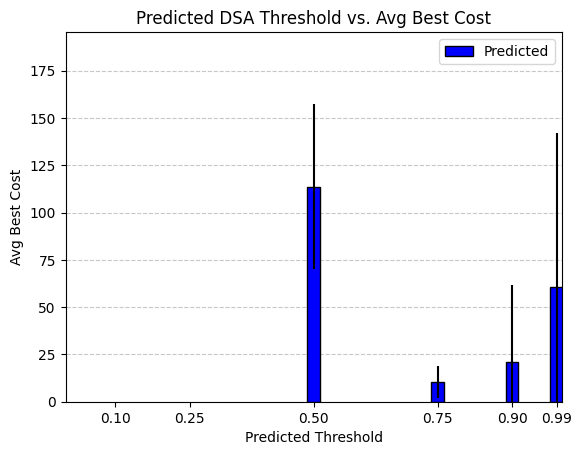

<Figure size 640x480 with 0 Axes>

In [75]:

# make std_dev dict
pred_std_dev = {k: np.std(v) for k,v in predicted_t_costs_arr.items()}
pred_std_dev = {k:v for k,v in pred_std_dev.items() if v > 0}
print(pred_std_dev)
plt.bar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr = pred_std_dev.values(), width=.025, color='b', label='Predicted', edgecolor='black',  zorder=2)

# plot standard deviation
# make std_dev dict

# plt.errorbar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr=std_dev.values(), fmt='o', color='r', label='Standard Deviation', zorder=3)


plt.ylim(0, max(predicted_t_costs.values()) + max(pred_std_dev.values()))  # Adjust the upper limit as needed
plt.xlim(0, 1)
plt.xticks(t_vals)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Predicted Threshold')
plt.ylabel('Avg Best Cost')
plt.title('Predicted DSA Threshold vs. Avg Best Cost')
plt.legend()
plt.show()
plt.clf()


In [67]:
t_vals = [0.1, 0.25, 0.5, .75, 0.9, 0.99]

pbar_t = tqdm(total=6)

dsa_thresholds = [0.1, 0.25, 0.5, .75, 0.9, 0.99]
t_costs_arr = {}
t_costs = {}
for t in dsa_thresholds:
    best_costs = []
    i = 0
    pbar = tqdm(total=250)
    while i < 250:
        # generate a random problem
        n_agent = np.random.choice(num_agents_list)
        e_density = np.random.choice(edge_density_list)
        g_type = np.random.choice(graph_types)
        n_actions = np.random.choice(num_actions_list)
        n_iter = np.random.choice(num_iterations)
        c_range = np.random.choice(cost_ranges)


        min_cost = run_dsa_experiment(num_agents=n_agent, edge_density=e_density, graph_type=g_type, dsa_threshold=t, num_actions=n_actions, niter=n_iter, cost_range=c_range, experiment = 'dsa_dataset', path = './DCOP_GRAPHS/DSA',  file_name = f'{n_agent}_{e_density}_{g_type}_{t}_{n_actions}_{n_iter}_{c_range}')
        best_costs.append(min_cost)
        i += 1
        pbar.update(1)

    t_costs_arr[t] = best_costs        
    best_cost = np.mean(best_costs)
    t_costs[t] = best_cost
    pbar_t.update(1)

print(t_costs)
static_t_costs = t_costs.copy()
static_t_costs_arr = t_costs_arr.copy()


  0%|          | 0/6 [00:27<?, ?it/s]

  0%|          | 0/250 [00:27<?, ?it/s]

















































































































































































































































100%|██████████| 250/250 [1:17:09<00:00, 18.52s/it]





















































































































































































































































100%|██████████| 250/250 [1:50:49<00:00, 26.60s/it]



















































































































































































































































100%|██████████| 6/6 [8:25:08<00:00, 4776.71s/it]  

{0.1: np.float64(56.84221812491944), 0.25: np.float64(66.21977404194097), 0.5: np.float64(61.56185795125414), 0.75: np.float64(56.478165982854755), 0.9: np.float64(66.88586839529663), 0.99: np.float64(54.88936002005913)}


{0.1: np.float64(82.92153320276071), 0.25: np.float64(89.9837470432106), 0.5: np.float64(84.7288385774648), 0.75: np.float64(77.15568846855867), 0.9: np.float64(82.74960372140869), 0.99: np.float64(74.21306056380793)}


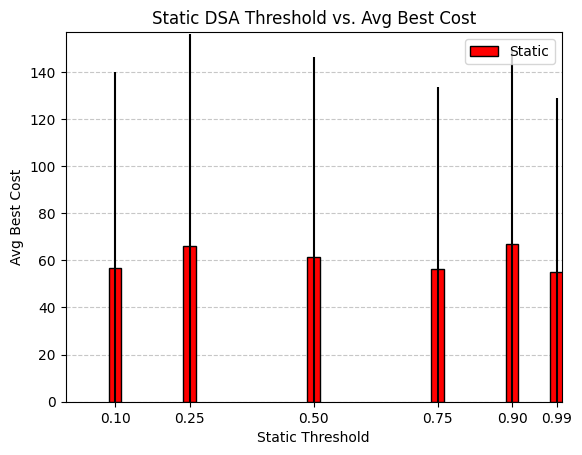

<Figure size 640x480 with 0 Axes>

In [74]:
static_std_dev = {k: np.std(v) for k,v in static_t_costs_arr.items()}
static_std_dev = {k:v for k,v in static_std_dev.items() if v > 0}
print(static_std_dev)
plt.bar(static_t_costs.keys(), static_t_costs.values(),yerr=static_std_dev.values() , width=.025, color='r', label='Static', edgecolor='black',  zorder=2)

# plot standard deviation
# make std_dev dict

#plt.errorbar(static_t_costs.keys(), static_t_costs.values(), yerr=std_dev.values(), fmt='none', color='g', label='Standard Deviation', zorder=3)

plt.ylim(0, max(static_t_costs.values()) + max(static_std_dev.values()))  # Adjust the upper limit as needed
plt.xlim(0, 1)
plt.xticks(t_vals)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Static Threshold')
plt.ylabel('Avg Best Cost')
plt.title('Static DSA Threshold vs. Avg Best Cost')
plt.legend()
plt.show()
plt.clf()

{0.1: np.float64(56.84221812491944), 0.25: np.float64(66.21977404194097), 0.5: np.float64(61.56185795125414), 0.75: np.float64(56.478165982854755), 0.9: np.float64(66.88586839529663), 0.99: np.float64(54.88936002005913)}


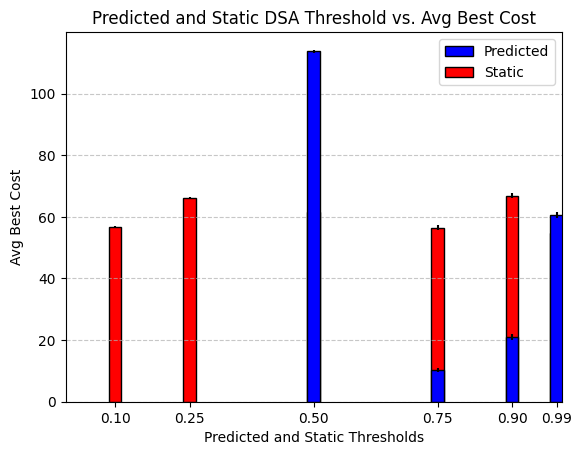

In [76]:

plt.bar(predicted_t_costs.keys(), predicted_t_costs.values(), yerr = pred_std_dev, width=.025, color='b', label='Predicted', edgecolor='black',  zorder=2)
plt.xlim(0, 1)
plt.xticks([k for k in t_costs.keys()])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Predicted and Static Thresholds')
plt.ylabel('Avg Best Cost')
plt.title('Predicted and Static DSA Threshold vs. Avg Best Cost')


print(static_t_costs)
plt.bar(static_t_costs.keys(), static_t_costs.values(), yerr = static_std_dev, width=.025, color='r', label='Static', edgecolor='black', zorder=1)
plt.legend()
plt.show()
    
# scatter plot
# plt.plot(t_costs.keys(), t_costs.values(), 'bo')

In [78]:
# save predicted_t_costs_arr and static_t_costs_arr to csv files

with open('DCOP_GRAPHS/DSA/predicted_t_costs_arr.csv', 'w') as f:
    f.write("Predicted_Threshold, Best Costs Arr\n")
    for key, arr in predicted_t_costs_arr.items():
        f.write("%s,%s\n"%(key,arr))

with open('DCOP_GRAPHS/DSA/static_t_costs_arr.csv', 'w') as f:
    f.write("Static_Threshold, Best Costs Arr\n")
    for key, arr in static_t_costs_arr.items():
        f.write("%s,%s\n"%(key,arr))